In [6]:
from pymongo import MongoClient
client = MongoClient('localhost', 27017)
db = client.patent_db

In [7]:
db.collection_names()

['patents']

In [8]:
client.database_names()

['admin', 'config', 'local', 'patent_db']

In [9]:
db.collection_names()

['patents']

In [10]:
db.patents.count()

262695

In [8]:
sample = db.patents.find_one()

In [9]:
sample

{'_id': ObjectId('5a352cf194eab40047be6bef'),
 'title': 'Semiconductor apparatus for controlling a frequency change of an internal clock',
 'number': 'US08839019B2',
 'classifications': [{'maingroup': '1',
   'first_class': '06',
   'section': 'G',
   'subclass': 'F',
   'subgroup': '08'},
  {'maingroup': '21',
   'first_class': '03',
   'section': 'H',
   'subclass': 'K',
   'subgroup': '00'}],
 'claims': [{'number': 1,
   'text': '\n1. A semiconductor apparatus comprising:\na clock frequency change block configured to output a plurality of internal clocks with different frequencies by dividing a frequency of an external clock in response to a mode register set signal and a setting command to enable the plurality of internal clocks to be outputted, and generate a frequency change end signal to designate the completion of a mode for changing frequencies of the internal clocks; and\na command generation block configured to receive a command and generate the setting command in response t

In [10]:
import spacy
nlp = spacy.load('en')

In [11]:
doc = nlp("The cat sat on the mat.")

In [12]:
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
          token.shape_, token.is_alpha, token.is_stop)

The the DET DT det Xxx True False
cat cat NOUN NN nsubj xxx True False
sat sit VERB VBD ROOT xxx True False
on on ADP IN prep xx True True
the the DET DT det xxx True True
mat mat NOUN NN pobj xxx True False
. . PUNCT . punct . False False


In [14]:
from graph import Graph

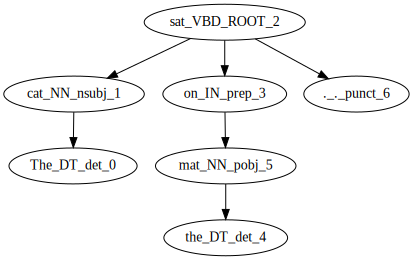

In [23]:
root = list(doc.sents)[0].root

g = Graph(root)

g.get_graphviz()

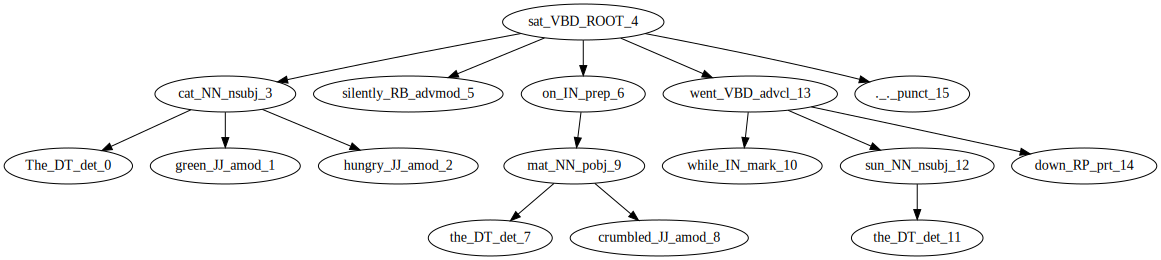

In [22]:
doc2 = nlp("The green hungry cat sat silently on the crumbled mat while the sun went down.")

root = list(doc2.sents)[0].root

g = Graph(root)

g.get_graphviz()

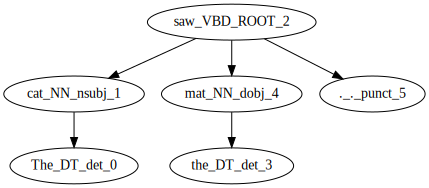

In [24]:
doc3 = nlp("The cat saw the mat.")

root = list(doc3.sents)[0].root

g = Graph(root)

g.get_graphviz()

So our algorithm is:
* Navigate tree until we reach a node with no children.
* Convert childless node to two nodes > POS with child WORD (we'll need to use an index to keep the nodes unique).
* Repeat once across the tree.
* Navigate to lowest parent nodes.
* Add parent node as child in the form POS with child WORD for childless node. Set order of nodes based on the index.
* Rename parent 
* Repeat for each level in the graph.

See here for graphviz help - http://matthiaseisen.com/articles/graphviz/

Basically we have a unique name for each node but change the node label.

Use here to remove border from bottom of graph - https://stackoverflow.com/questions/5904212/how-can-i-hide-the-node-boundary-in-graphviz.

(We can use either the left / right methods or use the indices - we'd get the same result.)

After we have processed the graph we then decompose into a set of rules based on PARENT > CHILD. We can aslo tag as terminal or non-terminal based on the number of children.

We then build up tables for each rule.

In [29]:
g._Graph__graph_dict

OrderedDict([(saw_VBD_ROOT_2, [cat_NN_nsubj_1, mat_NN_dobj_4, ._._punct_5]),
             (cat_NN_nsubj_1, [The_DT_det_0]),
             (The_DT_det_0, []),
             (mat_NN_dobj_4, [the_DT_det_3]),
             (the_DT_det_3, []),
             (._._punct_5, [])])

In [31]:
print(g.get_graphviz().source)

digraph {
	saw_VBD_ROOT_2
	cat_NN_nsubj_1
	The_DT_det_0
	mat_NN_dobj_4
	the_DT_det_3
	"._._punct_5"
	saw_VBD_ROOT_2 -> cat_NN_nsubj_1
	saw_VBD_ROOT_2 -> mat_NN_dobj_4
	saw_VBD_ROOT_2 -> "._._punct_5"
	cat_NN_nsubj_1 -> The_DT_det_0
	mat_NN_dobj_4 -> the_DT_det_3
}
